# ATC Analysis  
1.) Calculate Sab to ATC  
2.) Overview  

## Calculate Sab to ATC

In [2]:
from matplotlib import pylab as plt
import numpy as np
from sklearn import manifold


%matplotlib inline

In [3]:
def checkSameATC(atcs1,atcs2):
    '''
    Check overlap between atcs; 1 if overlap exists 0 if not. Check for at least ONE overlap within the two sets.
    Return 1 if true or 0 if false
    '''
        
    oneOverlap = False
    for atc1 in atcs1:
        for atc2 in atcs2:
            if atc1 == atc2:
                oneOverlap = True

    if oneOverlap:
        return  1
    else:
        return  0

In [3]:
def ATC_Self_ShortestPath():
    '''
    Check the influence of the Sab score on the chance of having overlappign ATC classes
    '''
    
 
    similarity_Type = 'MaxSpecificity'

    # Get all the CLOUD Targets
    cloud_ATC_First = {}
    cloud_ATC_First_Second = {}

    #Get all CLOUD to ATC annotations
    fp = open('../data/ATC_Analysis/CLOUD_to_ATC.csv', 'r')
    fp.next()

    for line in fp:
        tmp = line.strip().split(',')
        cloud_ATC_First[tmp[0]] = tmp[2].split(';')
        cloud_ATC_First_Second[tmp[0]] = tmp[3].split(';')

    #Load the Sab scores
    fp = open('../data/ATC_Analysis/Separation_half.csv', 'r')
    fp.next()
    drug_ShortestPath = {}
    for line in fp:
        tmp = line.strip().split(',')
        if tmp[2] != 'nan':
            drug_ShortestPath[tmp[0] + ',' + tmp[1]] = float(tmp[5])

    print 'First Level'
    #Split Sab scores in positive (>0 ) and negative (<0) scores. Then calculate the percent overlap (FIRST LEVEL)
    negative_sab = []
    positive_sab = []
    for drugPair in drug_ShortestPath:
        drugs = drugPair.split(',')
        if drug_ShortestPath[drugPair] < 0:
            negative_sab.append(checkSameATC(cloud_ATC_First[drugs[0]],cloud_ATC_First[drugs[1]]))
        else:
            positive_sab.append(checkSameATC(cloud_ATC_First[drugs[0]], cloud_ATC_First[drugs[1]]))

    #calcualte the percentage overlap
    negative_sab = sum(negative_sab)/float(len(negative_sab)) * 100
    positive_sab =  sum(positive_sab)/float(len(positive_sab)) * 100
    
    #Create the bar plot showing the overlap (in percent)
    plt.bar([0,1],[negative_sab,positive_sab],align='center', alpha=0.5, ecolor='black', capsize=10,color='#40B9D4', zorder=2)
    plt.xticks([0,1], ['Negative','Positive'])
    plt.xlabel("Sab")
    plt.ylabel("Percent overlap first level ATC")
    #plt.show()
    plt.savefig('../results/ATC_Analysis/ATC_First_Level_BarPlot.pdf',format='pdf')
    plt.close()


    print 'Second Level'
    #Split Sab scores in positive (>0 ) and negative (<0) scores. Then calculate the percent overlap (Second LEVEL)
    negative_sab = []
    positive_sab = []
    for drugPair in drug_ShortestPath:
        drugs = drugPair.split(',')
        if drug_ShortestPath[drugPair] < 0:
            negative_sab.append(checkSameATC(cloud_ATC_First_Second[drugs[0]], cloud_ATC_First_Second[drugs[1]]))
        else:
            positive_sab.append(checkSameATC(cloud_ATC_First_Second[drugs[0]], cloud_ATC_First_Second[drugs[1]]))

    #calcualte the percentage overlap
    negative_sab = sum(negative_sab)/float(len(negative_sab)) * 100
    positive_sab =  sum(positive_sab)/float(len(positive_sab)) * 100

    #Create the bar plot showing the overlap (in percent)
    plt.bar([0,1],[negative_sab,positive_sab],align='center', alpha=0.5, ecolor='black', capsize=10,color='#40B9D4', zorder=2)
    plt.xticks([0,1], ['Negative','Positive'])
    plt.xlabel("Sab")
    plt.ylabel("Percent overlap first level ATC")
    #plt.show()
    plt.savefig('../results/ATC_Analysis/ATC_First_Second_Level_BarPlot.pdf',format='pdf')
    plt.close()

    
    print 'Average Sab'
    #Inverse logic and now split Sab scores bases on if a drugpair has overlaping ATC classes or not
    same_ATC = []
    different_ATC = []
    for drugPair in drug_ShortestPath:
        drugs = drugPair.split(',')
        ATC_Overlap = checkSameATC(cloud_ATC_First_Second[drugs[0]], cloud_ATC_First_Second[drugs[1]])
        if ATC_Overlap == 1:
            same_ATC.append(drug_ShortestPath[drugPair])
        else:
            different_ATC.append(drug_ShortestPath[drugPair])


    #calcualte the mean Sab score for drug pairs with overlapping and without overlapping ATC classes
    same = np.mean(same_ATC)
    different = np.mean(different_ATC)

    #Create bar plot
    plt.bar([0, 1], [same, different], align='center', alpha=0.5, ecolor='black', capsize=10,color='#40B9D4', zorder=2, yerr=[1.96 * (np.std(x) / np.sqrt(float(len(x)))) for x in [same_ATC, different_ATC]])
    plt.xticks([0, 1], ['Yes', 'No'])
    plt.xlabel("Has ATC overlap")
    plt.ylabel("Average Sab")
    #plt.show()
    plt.savefig('../results/ATC_Analysis/Average_Sab_BarPlot.pdf', format='pdf')
    plt.close()

    #Create boxplot
    plt.boxplot( [same_ATC, different_ATC])
    plt.xticks([1, 2], ['Yes', 'No'])
    plt.xlabel("Has ATC overlap")
    plt.ylabel("Average Sab")
    plt.savefig('../results/ATC_Analysis/Average_Sab_BoxPlot.pdf', format='pdf')
    #plt.show()
    plt.close()


In [4]:
ATC_Self_ShortestPath()

IOError: [Errno 2] No such file or directory: '../data/ATC_Analysis/Separation_half.csv'

## Overview plot

Calculate distances between drug modules

44100
10344
Check Best Ratio


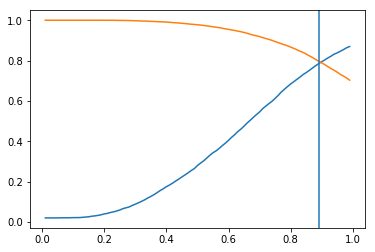

0.89
TP: 8116
FN: 2228
TN: 26906
FP: 6850
Accuracy: 0.79


In [61]:
#Get all targets and distances of the cloud drugs
fp = open('../data/ATC_Analysis/Separation_TargetsOnly.csv','r')
fp.next()
clouds = set()
distances = {}
Modulesizes = {}
separation = {}

# extract distance and drug module size for a given drug pair
for line in fp:
    tmp = line.strip().split(',')
    clouds.add(tmp[0])
    clouds.add(tmp[1])

    distances[tmp[0]+','+tmp[1]] = float(tmp[4])
    separation[tmp[0]+','+tmp[1]] = float(tmp[5])
    Modulesizes[tmp[0]] = float(tmp[2])
    Modulesizes[tmp[1]] = float(tmp[3])

#list of all CLOUDs
clouds = list(clouds)
clouds.sort()

#Create a sepparation matrix
seperation_matrix = []
labels = []
for c1 in clouds:
    labels.append(c1)
    tmp = []
    for c2 in clouds:
        tmp.append(distances[c1+','+c2])

    seperation_matrix.append(tmp)

#Perform a MDS to calculate minimum distance in 3D based on the similarity matrix (m-dim)
mds = manifold.MDS(n_components=3, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
X = mds.fit_transform(seperation_matrix)

#extract the drug positions from the MDS transformed space
drug_positions = {}
X_Rescaled = []
for pos,label in zip(X,labels):
    drug_positions[label] = pos * 1
    X_Rescaled.append(list(pos*1))

#Check for an optimal ratio (compromise between sensitivity and specificity)
#Therefor create a sensititivy/specificity plot
print 'Check Best Ratio'
correct_Overlap_List = []
correct_nonOverlap_List = []
x = []
for i in range(1, 100):
    i =  i/100.0

    x.append(i)

    sizes = []
    drug_Sizes = {}
    for l in labels:
        sizes.append(Modulesizes[l] * i / 2.0)
        drug_Sizes[l] = Modulesizes[l] * i /2.0

    correct_NonOverlap = 0
    total_NonOverlap = 0
    correct_Overlap = 0
    total_Overlap = 0
    for drug1 in labels:
        d1_size = drug_Sizes[drug1]
        d1_x_y_z = drug_positions[drug1]
        for drug2 in labels:
            d2_size = drug_Sizes[drug2]
            d2_x_y_z = drug_positions[drug2]

            C1C2 = np.sqrt((d1_x_y_z[0] - d2_x_y_z[0]) ** 2 + (d1_x_y_z[1] - d2_x_y_z[1]) ** 2 + (d1_x_y_z[2] - d2_x_y_z[2]) ** 2)



            actual = separation[drug1 + ',' + drug2] < 0
            visual = C1C2 < (d1_size + d2_size)

            if actual == True:
                total_Overlap += 1
                if visual == True:
                    correct_Overlap += 1
                    # print 'here?'

            if actual == False:
                total_NonOverlap += 1
                if visual == False:
                    correct_NonOverlap += 1
                    # print 'here?'


    correct_Overlap_List.append(float(correct_Overlap) / total_Overlap)
    correct_nonOverlap_List.append(float(correct_NonOverlap) / total_NonOverlap)

    
#Plot the specificity/sensitivity plt
plt.plot(x,correct_Overlap_List)
plt.plot(x,correct_nonOverlap_List)

#Find plot where the two lines intersect
idx = np.argwhere(np.diff(np.sign(np.array(correct_Overlap_List) - np.array(correct_nonOverlap_List)))).flatten()

#Extract the value
perfect_cut = x[idx[0]]

#plot the value as a vertical line
plt.axvline(perfect_cut)
plt.show()

#rescale the module sizes with this value
sizes = []
for l in labels:
    sizes.append(Modulesizes[l] * perfect_cut)

#save results
fp_out = open('../results/ATC_Analysis/Bubble_Positions_TargetsOnly.csv','w')
fp_out.write('Drug,X,Y,Z,Size\n')
for pos,size,l in zip(X,sizes,labels):
    fp_out.write(l+','+str(pos[0])+','+str(pos[1])+','+str(pos[2])+','+str(size)+'\n')
fp_out.close()



#
'''
sizes = []
drug_Sizes = {}
for l in labels:
    sizes.append(Modulesizes[l] * perfect_cut / 2.0)
    drug_Sizes[l] = Modulesizes[l] * perfect_cut /2.0

correct_NonOverlap = 0
total_NonOverlap = 0
correct_Overlap = 0
total_Overlap = 0
for drug1 in labels:
    d1_size = drug_Sizes[drug1]
    d1_x_y_z = drug_positions[drug1]
    for drug2 in labels:
        d2_size = drug_Sizes[drug2]
        d2_x_y_z = drug_positions[drug2]

        C1C2 = np.sqrt((d1_x_y_z[0] - d2_x_y_z[0]) ** 2 + (d1_x_y_z[1] - d2_x_y_z[1]) ** 2 + (d1_x_y_z[2] - d2_x_y_z[2]) ** 2)


        #only separations smaller than -0.2 are considered to be true overlapping
        actual = separation[drug1 + ',' + drug2] < 0
        visual = C1C2 < (d1_size + d2_size)

        if actual == True:
            total_Overlap += 1
            if visual == True:
                correct_Overlap += 1
                # print 'here?'

        if actual == False:
            total_NonOverlap += 1
            if visual == False:
                correct_NonOverlap += 1
                # print 'here?'


print 'TP: %d' %correct_Overlap
print 'FN: %d' %(total_Overlap - correct_Overlap)
print 'TN: %d' %correct_NonOverlap
print 'FP: %d' %(total_NonOverlap - correct_NonOverlap)
                
print 'Accuracy: %.2f' %(float(correct_Overlap+correct_NonOverlap)/(total_Overlap+total_NonOverlap))
'''